# Simple Regression

In [ ]:

from math import sqrt

In [ ]:
sqrt(1)

1.0

Quize 2
Coeff A and B

In [ ]:
def avg_parametr(array):
  return sum(array)/len(array)

def calc_fu_1(x, y):
  return sum([(i-avg_parametr(x)) * (j - avg_parametr(y)) for i, j in zip(x, y)]) / sum([ pow(i - avg_parametr(x), 2) for i in x])

def calc_fu_0(x, y, fu_1):
  return avg_parametr(y) - fu_1 * avg_parametr(x)

Quize 3
Standart Error for FU_1 and FU_0

In [ ]:
def SE_fu_0(fu_0, fu_1, x, y):
  fp = sqrt(sum([pow(j - fu_0 - fu_1 * i, 2) for i, j in zip(x, y)]) / (len(x) - 2))
  print(fp)
  sp = sqrt((1 / len(x)) + (avg_parametr(x)**2 / sum([pow(i - avg_parametr(x), 2) for i in x])))
  print(sp)
  return fp * sp

In [ ]:
def SE_fu_1(fu_0, fu_1, x, y):
  fp = sqrt(sum([ pow(j - fu_0 - (fu_1 * i),2) for i, j in zip(x, y)]) / (len(x) - 2))
  sp = sqrt(1 / sum([pow(i - avg_parametr(x), 2) for i in x]))
  return fp * sp

In [ ]:
n = 4
n_2 = n - 2
e = 0.05
print(f"1 - e/1 = {1 - e/2}")
t1 = 4.303

1 - e/1 = 0.975


In [ ]:
x = [13, 4, 11, 20]
y = [8, 5, 6, 15]

In [ ]:
fu_1 = calc_fu_1(x, y)
fu_0 = calc_fu_0(x, y, fu_1)
print(f"fu_1 = {fu_1}")
print(f"fu_0 = {fu_0}")

fu_1 = 0.6307692307692307
fu_0 = 0.930769230769231


In [ ]:
se_fu_0 = SE_fu_0(fu_0, fu_1, x , y)
se_fu_1 = SE_fu_1(fu_0, fu_1, x , y)
print(f"se_fu_1 = {se_fu_1}")
print(f"se_fu_0 = {se_fu_0}")

2.153708786828326
1.1652005439804376
se_fu_1 = 0.18889275627397964
se_fu_0 = 2.5095026499878137


Intervals

In [ ]:
def intervalFu(fu, t1, se_fu):
  return (fu - t1 * se_fu, fu + t1 * se_fu)
  

In [ ]:
interval_fu_0 = intervalFu(fu_0, t1, se_fu_0)
interval_fu_1 = intervalFu(fu_1, t1, se_fu_1)
print(f"interval_fu_0 = {interval_fu_0}")
print(f"interval_fu_1 = {interval_fu_1}")

interval_fu_0 = (-9.86762067212833, 11.729159133666792)
interval_fu_1 = (-0.1820362994777036, 1.443574761016165)


Quiz 4
Hypothesis testing

In [ ]:
def t_Test(fu, se_fu):
  return abs(fu - 0) / se_fu


In [ ]:
print(f"t_Test = {t_Test(fu_1, se_fu_1)}")

t_Test = 3.3392981457390087


Quiz 5 Estimating Model Accuracy

In [ ]:
def R_pow_2(x, y, fu_0, fu_1):
  return 1 - ((sum([ pow(j - fu_0 - (fu_1 * i),2) for i, j in zip(x, y)]))/(sum([pow(i - avg_parametr(y), 2) for i in y])))

In [ ]:
def RSE(x, y, fu_0, fu_1):
  return sqrt((1/(len(x) - 2)) * sum([ pow(j - fu_0 - (fu_1 * i),2) for i, j in zip(x, y)]))

In [ ]:
r = R_pow_2(x, y, fu_0, fu_1)
rse = RSE(x, y, fu_0, fu_1)
print(f"R**2 = {r}")
print(f"RSE = {rse}")

R**2 = 0.8479192938209331
RSE = 2.153708786828326


## Regression. / Exercise

In [ ]:
from sklearn.linear_model import LinearRegression
X = [14, 21, 25, 8, 20, 18, 17, 3, 1, 10]
Y = [36, 49, 72, 24, 56, 48, 51, 10, 3, 32]

In [ ]:
avg_parametr(X)

13.7

In [ ]:
avg_parametr(Y)

38.1

In [ ]:
c = calc_fu_1(X, Y)
c

2.638175144205559

In [ ]:
c_0 = calc_fu_0(X, Y, c)
c_0

1.9570005243838438

In [ ]:
r_2 = R_pow_2(X, Y, c_0, c)
r_2

0.9676535870007653

# 8.Classifiers: k-NN and Naive Bayes


Quiz 1

In [ ]:
def EuclideanMetric(x, x_def):
  return sqrt(sum([pow(i - j, 2) for i, j in zip(x, x_def)]))

def MinkowskiDistance(x, x_def):
  return pow(sum([pow(abs(i - j), len(x)) for i, j in zip(x, x_def)]), 1/len(x))

def ManhattanDistance(x, x_def):
  return sum([abs(i - j) for i, j in zip(x, x_def)])


def ChebyshevDistance(x, x_def):
  return max([abs(i - j) for i, j in zip(x, x_def)])


In [ ]:
x = [1, 3, -5, 7]
x_def = [2, -4, 0, 8]

EM = EuclideanMetric(x, x_def)
MD = ManhattanDistance(x, x_def)
CD = ChebyshevDistance(x, x_def)

print(f"EuclideanMetric = {EM}")
print(f"ManhattanDistance = {MD}")
print(f"Chebyshev = {CD}")



EuclideanMetric = 8.717797887081348
ManhattanDistance = 14
Chebyshev = 7


Quiz 2

In [ ]:
x = [[28, 10], [49, 49], [48, 35], [36,33], [45, 54]]
clas = [1, 1, 0, 1, 0] 
test = [33, 47]

In [ ]:
dis_Euclidean = [EuclideanMetric(test, i) for i in x ]
dis_Manhattan = [ManhattanDistance(test, i) for i in x ]
dis_Chebyshev = [ChebyshevDistance(test, i) for i in x ]
print(f"EuclideanMetric = {dis_Euclidean}")
print(f"ManhattanDistance = {dis_Manhattan}")
print(f"Chebyshev = {dis_Chebyshev}")

EuclideanMetric = [37.33630940518894, 16.1245154965971, 19.209372712298546, 14.317821063276353, 13.892443989449804]
ManhattanDistance = [42, 18, 27, 17, 19]
Chebyshev = [37, 16, 15, 14, 12]


Quiz 3

In [ ]:
def w(x, x_def):
  return 1 / pow(EuclideanMetric(x, x_def), 2)

In [ ]:
W = sum([w(test, x[i]) for i in range(0, len(x)) if clas[i] == 0])
W

0.007891374250530072

In [ ]:
W_1 = sum([w(test, x[i]) for i in range(0, len(x)) if clas[i] == 1])
W_1

0.00944156274141927

Quiz 3

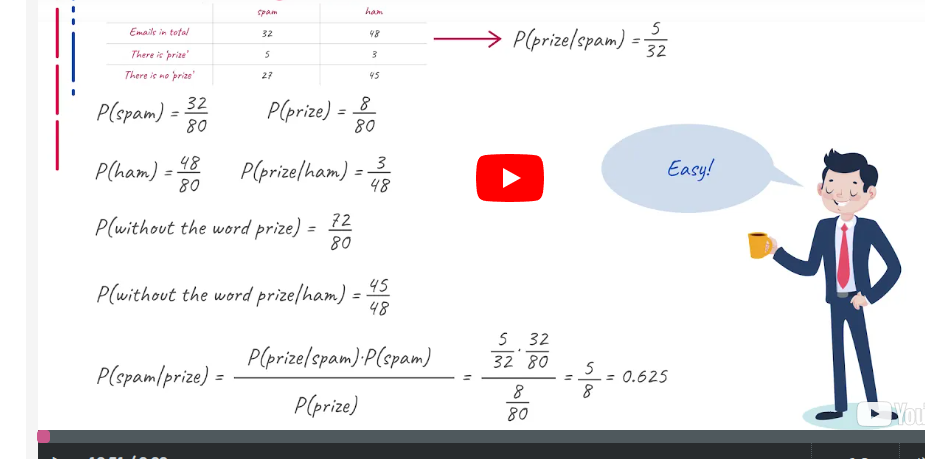

In [ ]:
all = 70
spam = 30
spam_prize = 6
ham = 40
ham_prize = 5


def bayesProb(spam_prize, spam, all, ham_prize):
  return ((spam_prize/spam) * (spam / all))/((ham_prize + spam_prize) / all)

print(f'Prob Bayes: {bayesProb(spam_prize, spam, all, ham_prize)}')

Prob Bayes: 0.5454545454545455


Quize 6

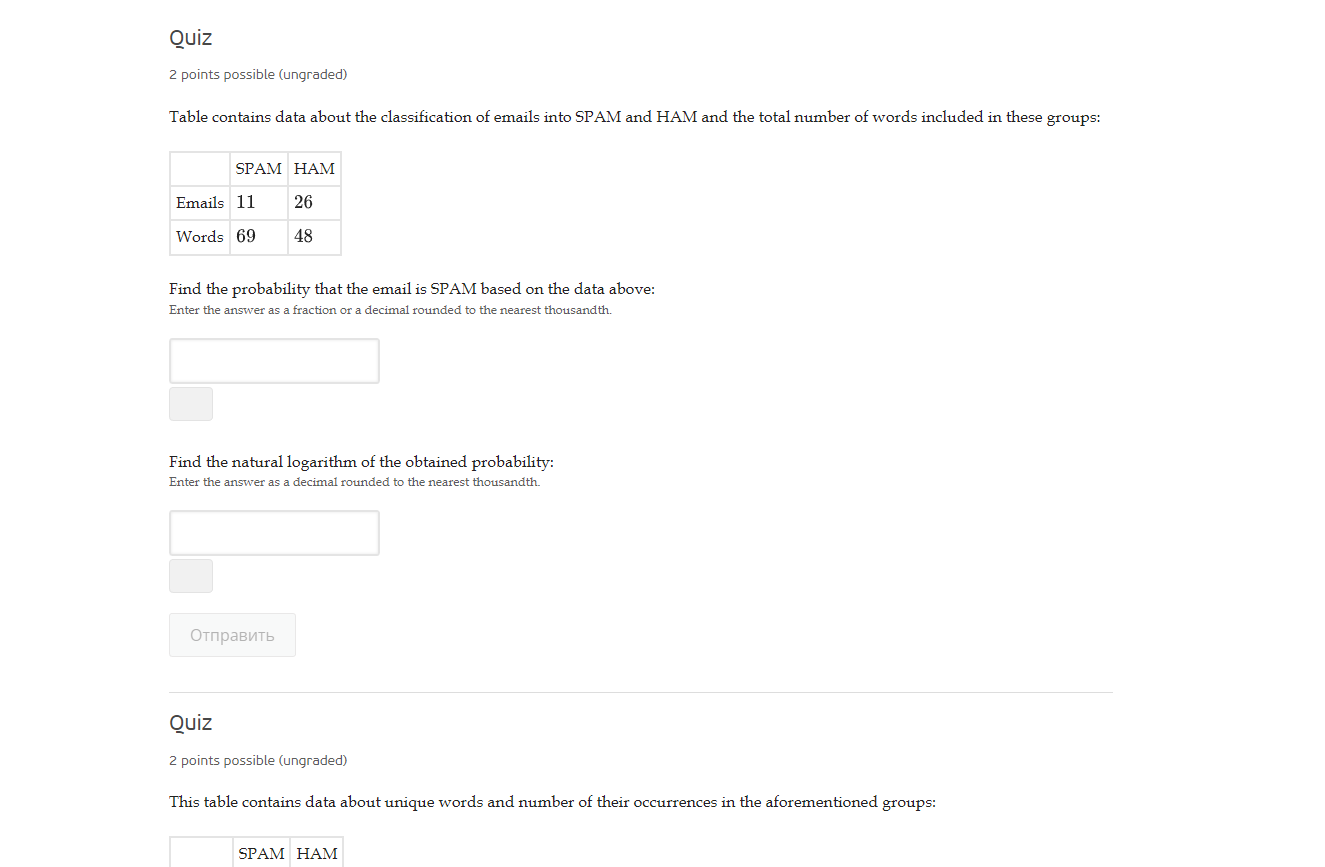

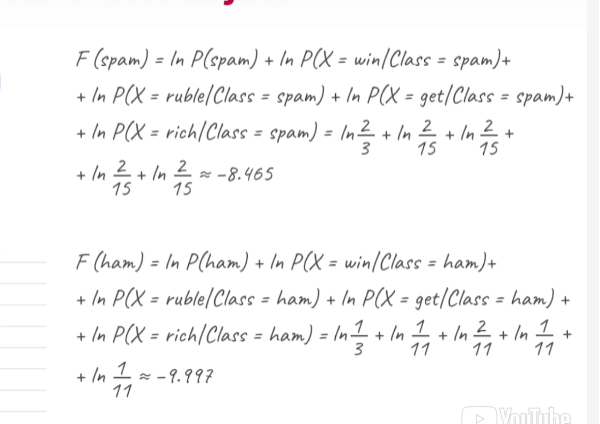

In [ ]:
import math
s_e = 11
s_w = 69
h_e = 26
h_w = 48

print(f'Prob: {s_e / (s_e + h_e)}')
print(f'Ln = {math.log(s_e / (s_e + h_e))}')

Prob: 0.2972972972972973
Ln = -1.213022639845854


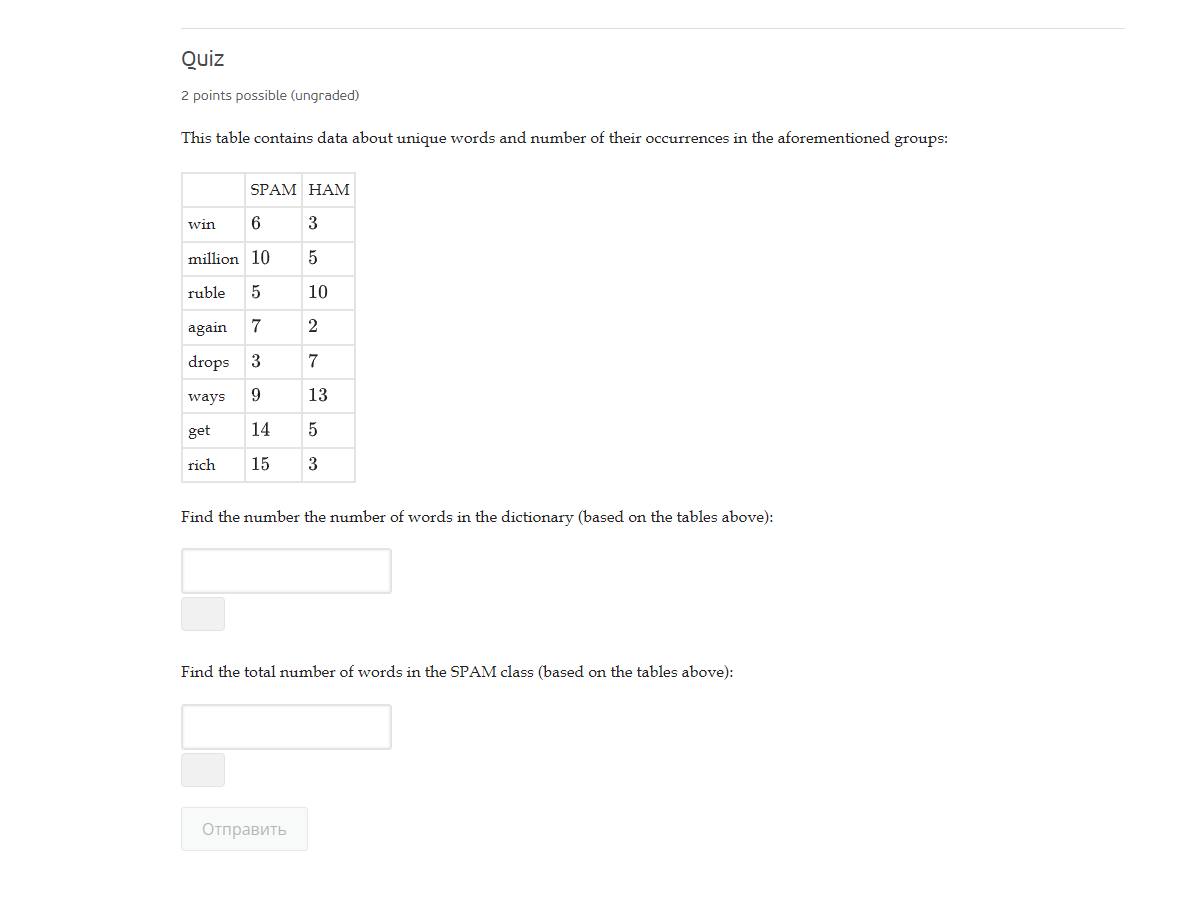

In [ ]:
print(f"Number: {9 + 15 + 15 + 9 + 10 + 22 + 19 + 18}")
print(f"Number in SPAM: {6 + 10 + 5 + 7 + 3 + 9 + 14 + 15}")

Number: 117
Number in SPAM: 69


## EXERCISE 8

In [ ]:
X = [70, 56, 45, 36, 33, 39, 19, 37, 28, 28]
Y = [80, 56, 99, 23, 33, 34, 39, 61, 16, 58]
Class = [0, 1, 1, 0, 0, 1, 1, 0, 1, 0]

In [ ]:
trainX = [[i,j] for i,j in zip(X, Y)]

In [ ]:
 from sklearn.neighbors import KNeighborsClassifier
 model = KNeighborsClassifier(p = 1, n_neighbors=3)

In [ ]:
model.fit(trainX, Class)

KNeighborsClassifier(n_neighbors=3, p=1)

In [ ]:
testX = [92, 85]

In [ ]:
pred = model.kneighbors([testX])
pred

(array([[27., 61., 65.]]), array([[0, 2, 1]]))

In [ ]:
pred = model.predict([testX])
pred

array([1])

Part 2

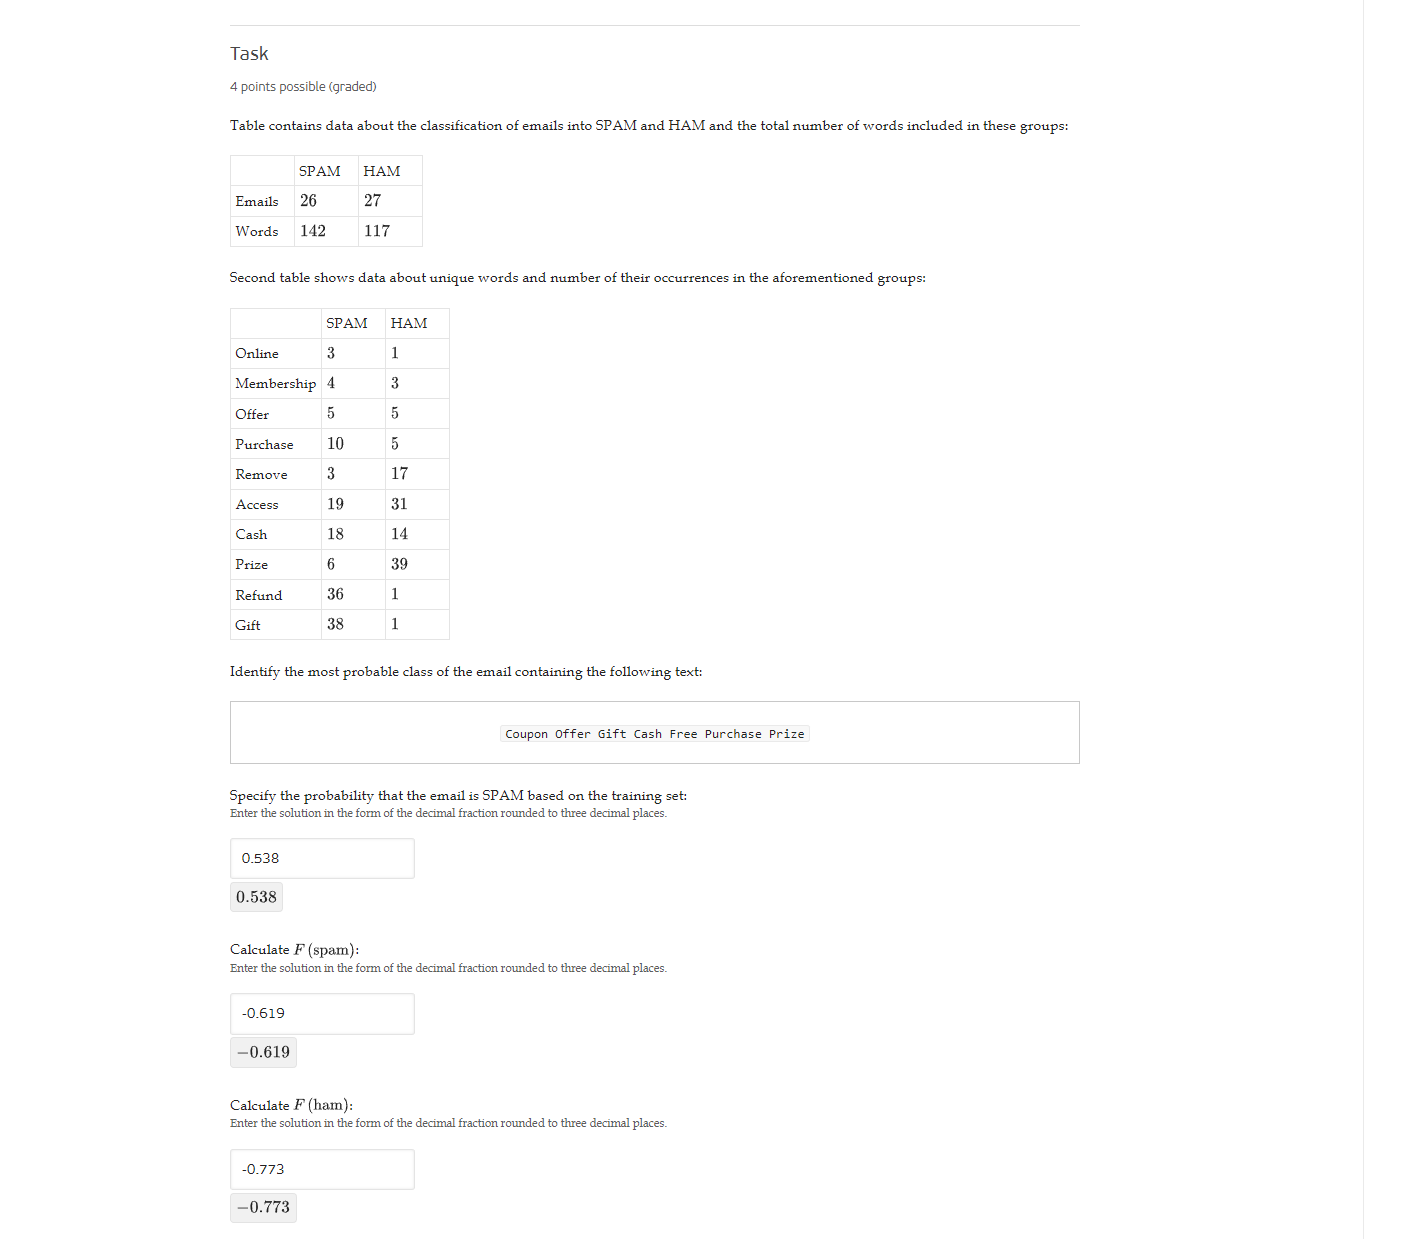

In [ ]:
import math
s_e = 26
s_w = 142
h_e = 27
h_w = 117

print(f'Prob: {(s_e / (s_e + h_e))}')
print(f'Ln_SPAM/ F(SPAM) = {math.log((s_e / (s_e + h_e)))}')
print(f'Ln_HAM/ F(HAM) = {math.log((117)/ ( 142 + 117))}')

Prob: 0.49056603773584906
Ln_SPAM/ F(SPAM) = -0.7121953755306398
Ln_HAM/ F(HAM) = -0.7946541269017816


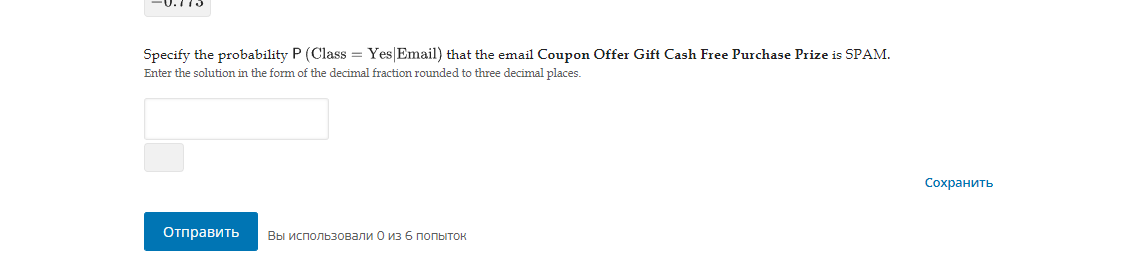

In [ ]:
spam_lbs = [
    [26,27],
    [142,117]
]
df2 = pd.read_csv('/content/drive/MyDrive/Course_ML_ITMO/data.csv', sep=',', encoding='utf-8')
df2

,name,spam,nespam
0,Online,3,1
1,Membership,4,3
2,Offer,5,5
3,Purchase,10,5
4,Remove,3,17
5,Access,19,31
6,Cash,18,14
7,Prize,6,39
8,Refund,36,1
9,Gift,38,1


In [ ]:
P_not_spam = spam_lbs[0][1] / (spam_lbs[0][0] + spam_lbs[0][1])
P_spam = spam_lbs[0][0] / (spam_lbs[0][0] + spam_lbs[0][1])
P_spam

0.49056603773584906

In [ ]:
V = df2.shape[0]
spam_count = sum(df2["spam"])
nespam_count = sum(df2["nespam"])
V

10

In [ ]:
test_sentence = "Coupon Offer Gift Cash Free Purchase Prize"
test_sentence = test_sentence.split(' ')
non_counted_words = set(set(test_sentence)).difference(df2["name"])
print(non_counted_words)
non_counted_words = len(non_counted_words)
print(non_counted_words)

{'Free', 'Coupon'}
2


In [ ]:
spam_weight = []
nespam_weight = []
for word in test_sentence:
  cur_row = df2["name"].isin([word])
  cur_row = df2[cur_row]
  if not cur_row.empty:
    spam_weight.append(math.log((1+cur_row["spam"])/(V+spam_count+non_counted_words)))
    nespam_weight.append(math.log((1+cur_row["nespam"])/(V+nespam_count+non_counted_words)))
  else:
    spam_weight.append(math.log(1/(V+spam_count+non_counted_words)))
    nespam_weight.append(math.log(1/(V+nespam_count+non_counted_words)))

print()
F_spam = sum(spam_weight) + math.log(P_spam)
F_nespam = sum(nespam_weight) + math.log(P_not_spam)
P_letter_spam = 1/(1+math.exp(F_nespam-F_spam))
print(F_spam)
print(F_nespam)
print(P_letter_spam)


-23.22729807604822
-24.019546103847297
0.6883138218082347


p(spam = yes) = 26 / 53

# 9. Classifiers: Logistic Regression

## Logistic Regression

Регрессионная модель предсказывает значение - непрерывную переменную.

Классификационная модель предсказывает класс - дискретную переменную с конечным числом значений.

### Типы алгоритмов:

Алгоритмы, которые моделируют совместное распределение вероятностей P (Y, X2, X2, ..., Xp), часто называют
генеративными алгоритмами.

Алгоритмы, которые моделируют P(Y/X1, X2, ..., Xp), называются дискриминационными алгоритмами.

Логистическая регрессия - это дискриминационный алгоритм.
P(Y= 1/X,, X, ..., X,) =
1 + (+0,%, +-+0,%)
Параметры алгоритма (коэффициенты O, 04, ..., p) оцениваются на основе обучающего набора данных.

In [ ]:
def odds(value):
  return value/(1 - value)
print(f'Odds: {odds(0.75)}')

Odds: 3.0


### Quiz 2
Select a logistic function:

sigmoid_func/logi_funk =  1/(1+e^-x) = (e^x)/(1+e^x)

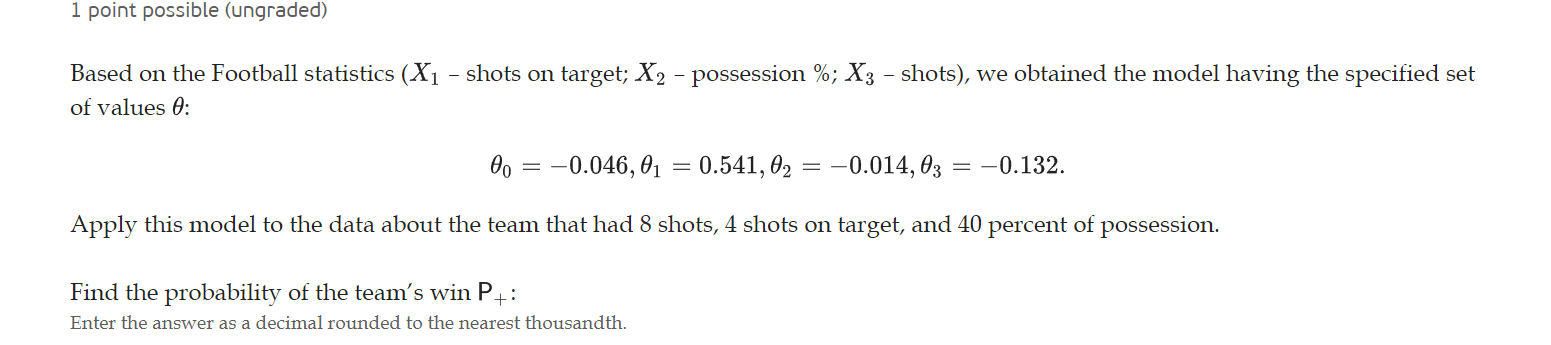

In [ ]:
import math
def P_plus(fu, values):
  arr = [fu[0], fu[1] * values[0], fu[2] * values[1], fu[3] * values[2]]
  return 1 / (1 + math.exp(-sum(arr)))

In [ ]:
fu = [-0.046, 0.541, -0.014, -0.132]
values = [4, 40, 8]
print(f'P+: {P_plus(fu, values)}')

P+: 0.6229292233842624


### Quiz 3

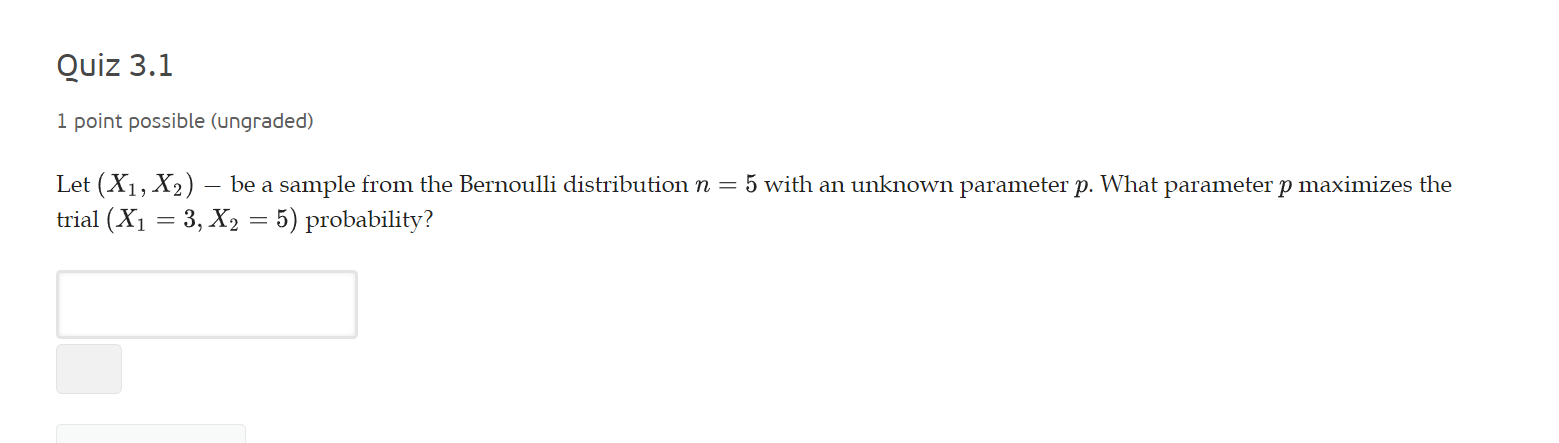

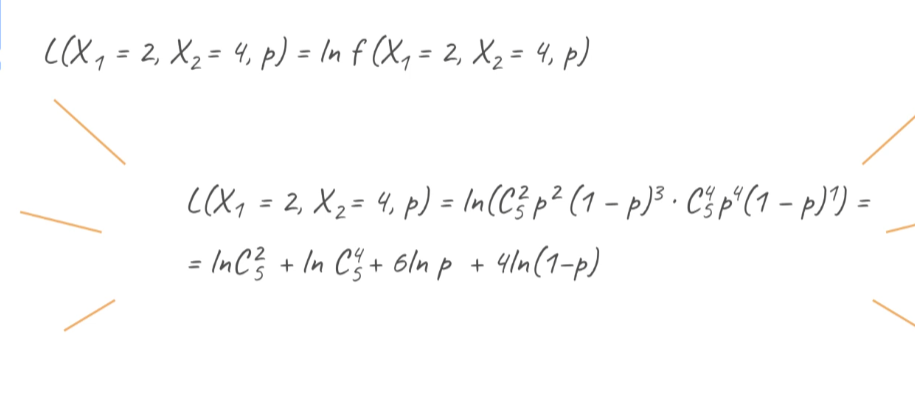

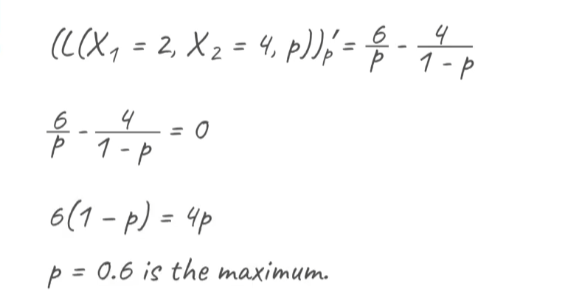

L(X_1 = 3, X_2 = 5) = Ln(C^2_5 * p^3 * (1 - p)^2) * C^5_5 * p^5(1-p)^0)

8(1 - p) = 2p

8 = 10p

p= 0.8


### Quiz 4

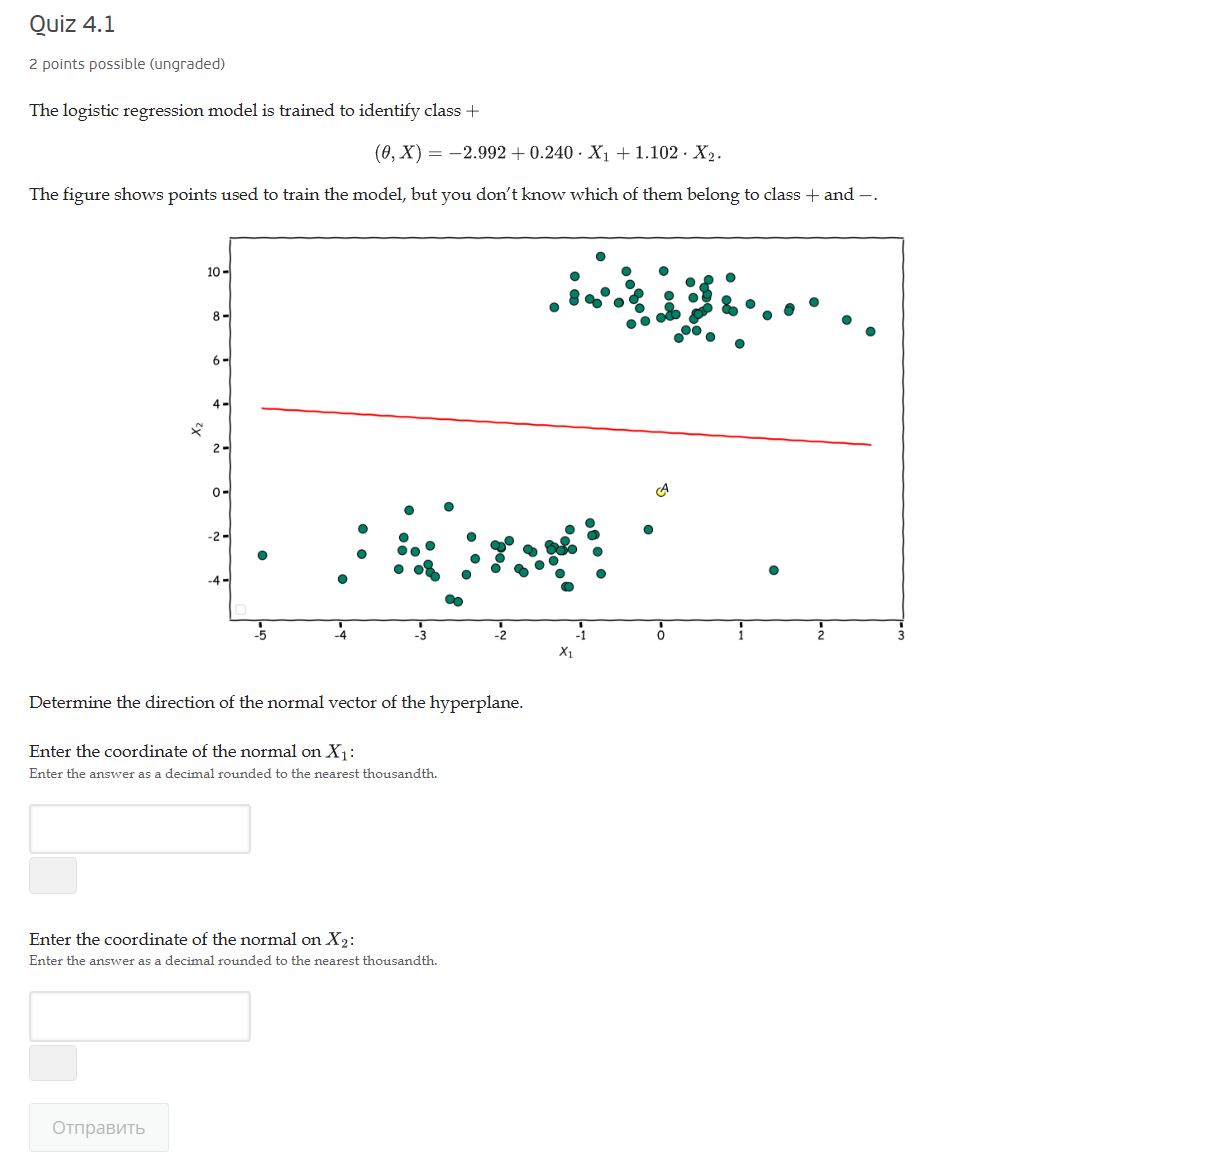

In [ ]:
import math
print(f"Probability A {1 / (1 + math.exp(2.992))}")

Probability A 0.047788597799115824


In [ ]:
import math
def P_plus(fu, values):
  arr = [fu[0], fu[1] * values[0], fu[2] * values[1]]
  return 1 / (1 + math.exp(-sum(arr)))

In [ ]:
TP = 5
FP = 2 
FN = 2
TN = 3
print(f"TRP {TP/(FN + TP)}")
print(f"FRP {FP/(FN + TN)}")

TRP 0.7142857142857143
FRP 0.4


In [ ]:
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Course_ML_ITMO/data/candy-data.csv')

In [ ]:
df.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent,Y
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725,1
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936,1
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086,0
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505,0
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465,1


In [ ]:
df['competitorname']

0                 100 Grand
1              3 Musketeers
2                  One dime
3               One quarter
4                 Air Heads
              ...          
65         Snickers Crisper
66          Sour Patch Kids
67    Sour Patch Tricksters
68                Starburst
69      Strawberry bon bons
Name: competitorname, Length: 70, dtype: object

In [ ]:
import numpy
np.unique(np.array(df['competitorname'].isin(['Chewey Lemonhead Fruit Mix', 'Runts', 'Sixlets'])))

array([False])

In [ ]:
df = df[~df['competitorname'].isin(['Chewey Lemonhead Fruit Mix', 'Runts', 'Sixlets'])]

In [ ]:
df['competitorname']

0                 100 Grand
1              3 Musketeers
2                  One dime
3               One quarter
4                 Air Heads
              ...          
65         Snickers Crisper
66          Sour Patch Kids
67    Sour Patch Tricksters
68                Starburst
69      Strawberry bon bons
Name: competitorname, Length: 67, dtype: object

In [ ]:
trainX = df.iloc[:,1:12]

In [ ]:
trainX.head()

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent
0,1,0,1,0,0,1,0,1,0,0.732,0.860
1,1,0,0,0,1,0,0,1,0,0.604,0.511
2,0,0,0,0,0,0,0,0,0,0.011,0.116
3,0,0,0,0,0,0,0,0,0,0.011,0.511
4,0,1,0,0,0,0,0,0,0,0.906,0.511


In [ ]:
trainY = df.iloc[:,13:14]

In [ ]:
trainY

,Y
0,1
1,1
2,0
3,0
4,1
...,...
65,1
66,1
67,1
68,1


In [ ]:
model = LogisticRegression(random_state = 2019, solver = 'lbfgs').fit(trainX, trainY)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
df_test = pd.read_csv("/content/drive/MyDrive/Course_ML_ITMO/data/candy-test.csv") 

In [ ]:
df_test.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,Y
0,Sugar Babies,0,1,1,0,0,0,1,0,1,0.647364,0.7670,0
1,Sugar Daddy,1,0,0,0,1,0,1,0,0,0.418000,0.3250,0
2,Super Bubble,0,1,0,0,0,0,0,0,0,0.162000,0.1160,0
3,Swedish Fish,0,1,0,0,0,0,0,0,1,0.604000,0.7550,1
4,Tootsie Pop,1,0,0,0,0,0,0,0,0,0.876560,0.5654,1


In [ ]:
testX = df_test['competitorname'].isin(['Tootsie Roll Juniors'])
testX = df_test[testX]
testX = testX.iloc[:,1:12]

In [ ]:
testX

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent
5,1,0,0,0,0,0,0,0,0,0.313,0.511


In [ ]:
predict = model.predict_proba(testX)
print(f'Вероятность  Tootsie Roll к классу 0 и 1:{predict}')

Вероятность  Tootsie Roll к классу 0 и 1:[[0.28300469 0.71699531]]


In [ ]:
testX = df_test['competitorname'].isin(['Tootsie Roll Midgies'])
testX = df_test[testX]
testX = testX.iloc[:,1:12]

In [ ]:
predict = model.predict_proba(testX)
print(f'Вероятность  Tootsie Roll Midgies  к классу 0 и 1:{predict}')

Вероятность  Tootsie Roll Midgies  к классу 0 и 1:[[0.25917458 0.74082542]]


In [ ]:
testX = df_test.iloc[:,1:12]
testY = df_test.iloc[:,12:13]

In [ ]:
predict = model.predict(testX)
predict

array([0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1])

In [ ]:
from sklearn.metrics import accuracy_score, roc_auc_score
print(f"Accuracy : {accuracy_score(testY, predict)}")

Accuracy : 0.6666666666666666


In [ ]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(testY, predict).ravel()

In [ ]:
print(f"Precision: {tp/(tp + fp)}")
print(f"Recall: {tp/(tp + fn)}")
print(f"Accuracy : {(tp+tn)/(tp + tn + fp + fn)}")

Precision: 0.5
Recall: 0.6
Accuracy : 0.6666666666666666


In [ ]:
predict = model.predict_proba(testX)[::,1]

In [ ]:
predict

array([0.2860383 , 0.40005443, 0.34872332, 0.40179884, 0.78027773,
       0.71699531, 0.74082542, 0.80266581, 0.38536553, 0.39258965,
       0.35694444, 0.1495334 , 0.38229878, 0.59009405, 0.78523424])

In [ ]:
print(f"AUC : {roc_auc_score(testY, predict)}")

AUC : 0.86


# 9. Clastering


### Quiz 2.2

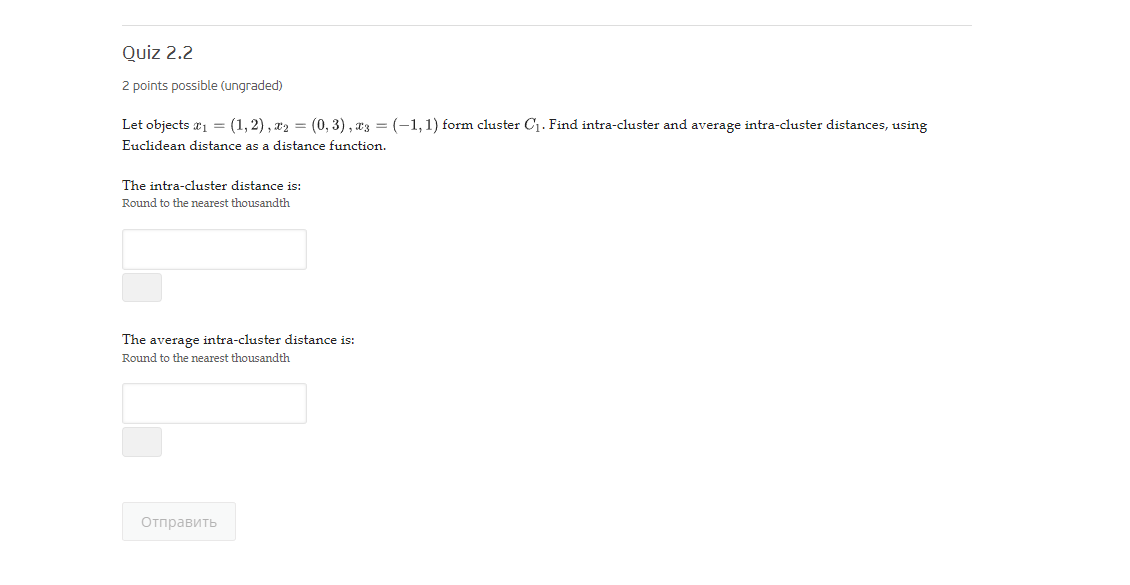

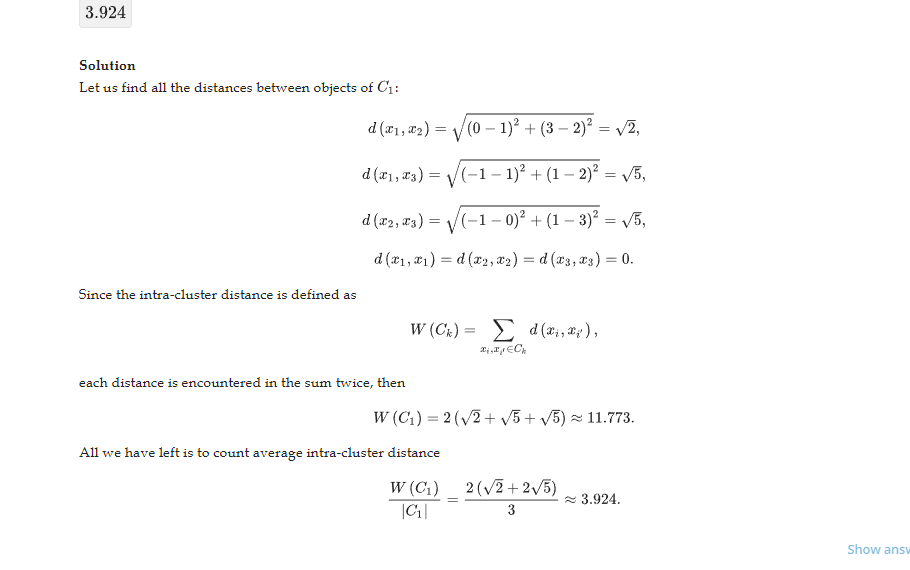

In [ ]:
# 

# 10!!!! for Egorich

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
model = KMeans(n_clusters=3, init=np.array([[12.0, 11.5], [12.71, 13.43], [10.5, 8.75]]), max_iter=100, n_init=1)

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Course_ML_ITMO/kmeans.csv', sep=',', encoding='utf-8')
df

,Object,X,Y,Cluster
0,1,5,9,0
1,2,10,14,1
2,3,2,9,2
3,4,11,11,1
4,5,14,18,2
5,6,9,15,0
6,7,20,16,1
7,8,18,5,2
8,9,16,3,0
9,10,8,3,2


In [ ]:
x = df.iloc[:,1:3]

In [ ]:
x

,X,Y
0,5,9
1,10,14
2,2,9
3,11,11
4,14,18
5,9,15
6,20,16
7,18,5
8,16,3
9,8,3


In [ ]:
model = model.fit(x)

In [ ]:
predict = model.predict(x)
predict

array([0, 0, 0, 0, 1, 0, 1, 2, 2, 2, 1, 1, 0, 1, 0], dtype=int32)

In [ ]:
pred = model.fit_transform(x)

In [ ]:
pred

array([[ 4.16496564, 13.86362146, 10.46156988],
       [ 3.19438282,  7.49666593, 11.08051343],
       [ 6.26131629, 16.60120478, 13.1318104 ],
       [ 4.16496564,  7.65506368,  7.92324288],
       [ 8.74584449,  4.40454311, 14.33333333],
       [ 3.05727637,  8.40238062, 12.38726945],
       [13.30643545,  2.7202941 , 13.71536041],
       [13.23646787, 10.21763182,  4.21637021],
       [13.04075245, 12.28006515,  2.10818511],
       [ 9.60973146, 15.40129865,  6.03692343],
       [12.61760998,  3.84707681, 15.84648577],
       [12.3833331 ,  6.40312424,  7.31057073],
       [ 2.57539377, 12.4579292 , 13.70320319],
       [ 8.97161055,  1.84390889, 10.52510227],
       [ 3.53409054,  9.43398113, 13.71536041]])

In [ ]:
ans = []
for i in range(0, len(pred)):
  if i == 0 or i == 1 or i==2 or i==3 or i == 5 or i==12 or i == 14:
    ans.append(pred[i][0])
sum(ans)/len(ans) 

3.8503415799006464

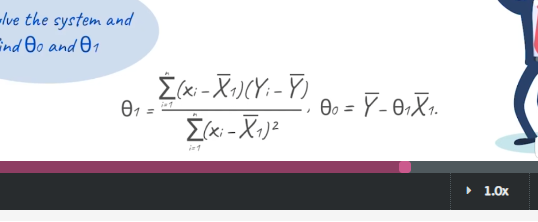

In [4]:
from sklearn.linear_model import LinearRegression
X = [[1], [-1]]
y = [2, 0]
reg = LinearRegression().fit(X, y)
reg.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}